In [90]:
#Practicing what I couldn't do at Indeed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot

In [91]:
address = '//prc-cs-f9dkb42/ecozzolino$/Desktop/code/toyindeed.csv'
df = pd.read_csv(address)
df.head(10)

,advertiser,salesrep,revenue,activitydate
0,1,1,0,1/1/2018
1,1,333,100,1/2/2018
2,1,1,200,1/3/2018
3,1,444,0,1/4/2018
4,2,333,5000,1/5/2018
5,2,1,60,1/6/2018
6,2,444,1,1/7/2018
7,2,444,0,1/8/2018
8,2,444,20000,1/9/2018
9,3,333,0,1/10/2018


In [92]:
df.info()
#From this, we can see that activitydate is an object - want it timeseries and index of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
advertiser      56 non-null int64
salesrep        56 non-null int64
revenue         56 non-null int64
activitydate    56 non-null object
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [93]:
df.activitydate = pd.to_datetime(df.activitydate)
df.set_index('activitydate', inplace=True)

In [94]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2018-01-01 to 2018-02-25
Data columns (total 3 columns):
advertiser    56 non-null int64
salesrep      56 non-null int64
revenue       56 non-null int64
dtypes: int64(3)
memory usage: 1.8 KB


,advertiser,salesrep,revenue
activitydate,,,
2018-01-01,1,1,0
2018-01-02,1,333,100
2018-01-03,1,1,200
2018-01-04,1,444,0
2018-01-05,2,333,5000


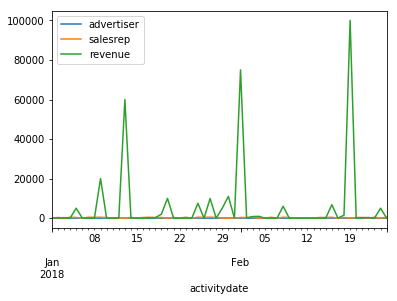

In [95]:
df.plot()
plt.show()

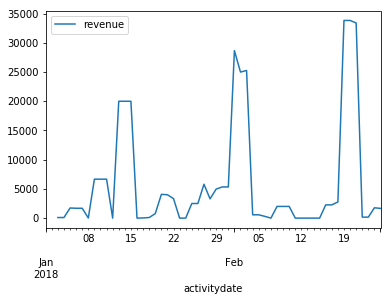

In [96]:
revenue = df[['revenue']]
revenue.rolling(3).mean().plot()
#BOOM! 3-day moving average

In [97]:
df.groupby('salesrep').describe()

advertiser                                                revenue  \
              count      mean       std  min   25%  50%  75%   max   count   
salesrep                                                                     
1              24.0  5.833333  2.745220  1.0  3.00  6.0  8.0  10.0    24.0   
333            16.0  5.687500  2.798065  1.0  3.75  5.5  8.0  10.0    16.0   
444            16.0  5.562500  2.827690  1.0  3.50  6.0  7.0  10.0    16.0   

                                                                      
                 mean           std  min  25%  50%     75%       max  
salesrep                                                              
1         8019.166667  23152.213514  0.0  0.0  0.0  1925.0  100000.0  
333       5250.000000  18646.429506  0.0  0.0  0.0   525.0   75000.0  
444       3193.812500   5621.049655  0.0  0.0  0.5  6200.0   20000.0

In [98]:
df.groupby('salesrep').mean()
df.head()

,advertiser,salesrep,revenue
activitydate,,,
2018-01-01,1,1,0
2018-01-02,1,333,100
2018-01-03,1,1,200
2018-01-04,1,444,0
2018-01-05,2,333,5000


In [104]:
df['salesrep'].replace(1, np.nan, inplace=True)
#NEED INPLACE=TRUE or it won't write over!!!


#FILL IN W/ PRIOR VALUES: first, replace w/ nan
#next, replace nan w/ prior value!!!

In [107]:
df.head(20)

,advertiser,salesrep,revenue
activitydate,,,
2018-01-01,1,NaN,0
2018-01-02,1,333.0,100
2018-01-03,1,NaN,200
2018-01-04,1,444.0,0
2018-01-05,2,333.0,5000
2018-01-06,2,NaN,60
2018-01-07,2,444.0,1
2018-01-08,2,444.0,0
2018-01-09,2,444.0,20000


In [111]:
df['rep2']=df['salesrep']

In [112]:
df.head(20)

,advertiser,salesrep,revenue,rep2
activitydate,,,,
2018-01-01,1,NaN,0,NaN
2018-01-02,1,333.0,100,333.0
2018-01-03,1,NaN,200,NaN
2018-01-04,1,444.0,0,444.0
2018-01-05,2,333.0,5000,333.0
2018-01-06,2,NaN,60,NaN
2018-01-07,2,444.0,1,444.0
2018-01-08,2,444.0,0,444.0
2018-01-09,2,444.0,20000,444.0


In [113]:
grouped = df.groupby('advertiser')

In [115]:
grouped.mean()

,salesrep,revenue,rep2
advertiser,,,
1,388.50,75.000000,388.50
2,416.25,5012.200000,416.25
3,333.00,10000.000000,333.00
4,370.00,100.000000,370.00
5,388.50,2785.714286,388.50
6,399.60,12612.500000,399.60
7,416.25,1100.000000,416.25
8,333.00,0.000000,333.00
9,388.50,27075.000000,388.50


,rep2,revenue,salesrep
activitydate,,,
2018-01-01,NaN,0,NaN
2018-01-02,333.0,100,333.0
2018-01-03,333.0,200,333.0
2018-01-04,444.0,0,444.0
2018-01-05,333.0,5000,333.0
2018-01-06,333.0,60,333.0
2018-01-07,444.0,1,444.0
2018-01-08,444.0,0,444.0
2018-01-09,444.0,20000,444.0


In [117]:
grouped.revenue.mean()

advertiser
1        75.000000
2      5012.200000
3     10000.000000
4       100.000000
5      2785.714286
6     12612.500000
7      1100.000000
8         0.000000
9     27075.000000
10      916.666667
Name: revenue, dtype: float64

In [118]:
df['rep2']=df['salesrep'].fillna(method='ffill')

In [121]:
df.head(50)

,advertiser,salesrep,revenue,rep2
activitydate,,,,
2018-01-01,1,NaN,0,NaN
2018-01-02,1,333.0,100,333.0
2018-01-03,1,NaN,200,333.0
2018-01-04,1,444.0,0,444.0
2018-01-05,2,333.0,5000,333.0
2018-01-06,2,NaN,60,333.0
2018-01-07,2,444.0,1,444.0
2018-01-08,2,444.0,0,444.0
2018-01-09,2,444.0,20000,444.0


In [122]:
df['rep3']=df['salesrep'].fillna(method='bfill')
#Fills in the whole thing, not grouped by advertiser...

In [124]:
df.head(50)

,advertiser,salesrep,revenue,rep2,rep3
activitydate,,,,,
2018-01-01,1,NaN,0,NaN,333.0
2018-01-02,1,333.0,100,333.0,333.0
2018-01-03,1,NaN,200,333.0,444.0
2018-01-04,1,444.0,0,444.0,444.0
2018-01-05,2,333.0,5000,333.0,333.0
2018-01-06,2,NaN,60,333.0,444.0
2018-01-07,2,444.0,1,444.0,444.0
2018-01-08,2,444.0,0,444.0,444.0
2018-01-09,2,444.0,20000,444.0,444.0


In [125]:
df.groupby('rep2').mean()
#Okay - I think this worked (or, good enough that I could show something for this)

,advertiser,salesrep,revenue,rep3
rep2,,,,
333.0,5.566667,333.0,8485.333333,347.80
444.0,6.080000,444.0,2920.040000,426.24


In [138]:
def consecutive(x, y, z):
    for x in df:
        print(len(z))
        #if y>0
        
x=df['advertiser']
y=df['revenue']
z=df['activitydate']
print(consecutive(x, y, z))

#OKAY STUCK HERE!

#if revenue!=0:
    #for x in df.advertiser:
        #sum

KeyError: 'activitydate'

In [ ]:
#Things I tried for this that didn't work/do what they were supposed to 
'''
grouped.fillna(method='ffill')
#This didn't work!

df['rep2'] = df.salesrep.shift(1): this supposedly shifts up by 1 value

del df['rep2']: this is how you delete a column

#df.salesrep2=df.where(df.salesrep!=1, np.nan): this didn't replace 1 with nan

df['rep3']=df['salesrep'].fillna(method='bfill')
#Fills in the whole thing, not grouped by advertiser...

if df[['salesrep']] !=1:
    pass
elif df[['salesrep']]==1:
    df.salesrep.shift(-1)
    
'''